<img src="../img/Signet_FNW_1.svg" alt="OVGU_FNW_Logo" width="300" align="right">

# 2.10. Geometrical optics: Optical instruments

Using our understanding of reflection and refraction, we can study lenses.
In essence, incident rays can be reflected by or transmitted in to the lense. 
These principles form the foundation for understanding a wide variety of optical instruments, from the simple magnifying glass to the complex telescope and even the human eye itself.
In this chapter, we will explore how lenses form images, derive key equations governing their behavior, and investigate the workings of several important optical devices, including their limitations due to aberrations.

## 2.10.1 Primer on lenses &amp; the Lensmaker's equation

Lenses are essential for optical systems.
Like for mirrors, the surface os a lens can be **planar**, **convex** (bulged towards the viewer), or **concave** (bulged inwards like a cave).
Because **lenses have two surfaces**, there are different combinations of these surfaces, but the most important once for us will be **double convex** and **double concave** lenses.
The two surfaces of a lens can have different curvatures, meaning their radii do not need to be the same.
Note that, convex lenses are also called converging lenses, and concave lenses diverging lenses.

When an incident ray (in air) reached the first surface of a lens, obeying *Snell's law*, it will be refracted (ignoring reflection for now).
As the refracted ray reaches the second surface of the lens, it will be refracted again (this time transmission from lens to air).
Like mirror, lenses have **focal points** and a **focal length**.
Notably, and as described by the **Lensmaker's equation**, the focal length of a lens is the same for both sides even if the surfaces have different curvatures, i.e. $R_1$ and $R_2$:
$$\frac{1}{f} = (n-1)(\frac{1}{R_1} + \frac{1}{R_2})$$
with $n$ as the index of refraction and $R$ taken as *positive* for convex and a *negative* for concave surfaces.
As state above, both sides of the lens have the same focal length because we can turn around the lens, i.e. swap $R_1$ and $R_2$, and still obtain the same numerical result from the Lensmaker's equation.
There is an important caveat to this equation: it assumes a **thin lens** which will be discussed in the next section.


interactive(children=(FloatSlider(value=1.0, description='Ray Height', max=3.0, min=-3.0, step=0.5), FloatSlid…

<function __main__.plot_lens_and_ray(incident_ray_y, n_lens=1.5, lens_center_offset=-4, lens_radius=4)>

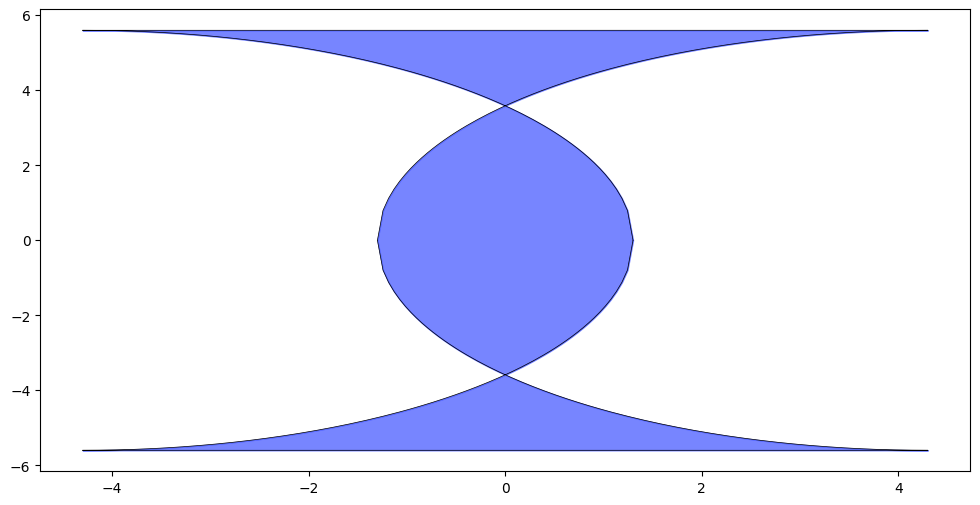

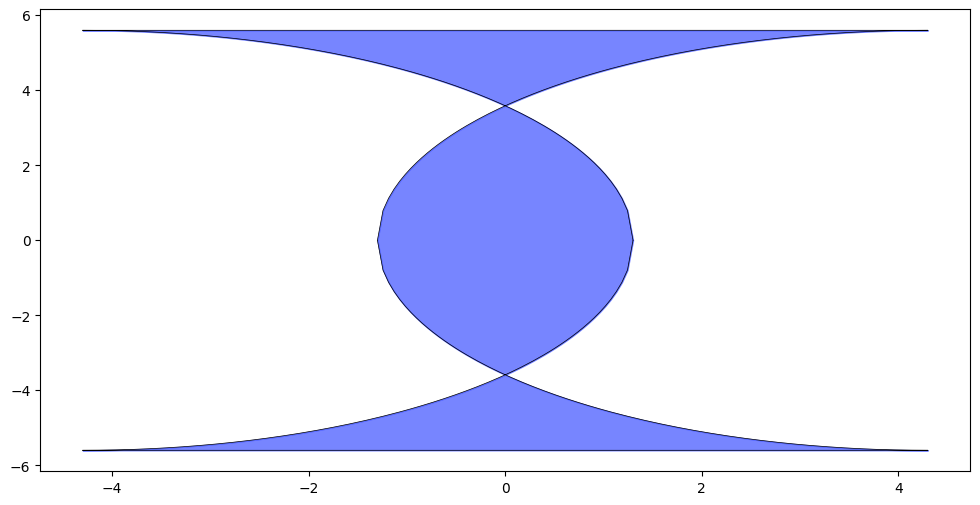

In [ ]:
# AI generated mess with suboptimal human edits
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

RAY_LENGTH = 5
N_AIR = 1.0
N_LENS_DEFAULT = 1.5

SIMULATION_BOUNDS = {'x_max': 7, 'y_max': 5}

# --- Helper Functions ---
def solve_quadratic(a, b, c):
    """Solves the quadratic equation ax^2 + bx + c = 0."""
    delta = b**2 - 4 * a * c
    if delta < 0:
        return []
    elif delta == 0:
        return [-b / (2 * a)]
    else:
        return [(-b + np.sqrt(delta)) / (2 * a), (-b - np.sqrt(delta)) / (2 * a)]

def get_circle_intersection(ray_origin, ray_direction, circle_center, circle_radius):
    """
    Finds the intersection point(s) of a ray and a circle.
    Ray: r(t) = origin + t * direction (where direction is a unit vector)
    Circle: (x - center_x)^2 + (y - center_y)^2 = radius^2
    """
    oc = ray_origin - circle_center
    a = np.dot(ray_direction, ray_direction)
    b = 2.0 * np.dot(oc, ray_direction)
    c = np.dot(oc, oc) - circle_radius**2
    discriminant = b * b - 4 * a * c
    if discriminant < 0:
        return []
    else:
        sqrt_discriminant = np.sqrt(discriminant)
        t1 = (-b + sqrt_discriminant) / (2 * a)
        t2 = (-b - sqrt_discriminant) / (2 * a)
        intersection_points_with_t = []
        if t1 >= 1e-9:  # Consider only forward intersections
            intersection_points_with_t.append((ray_origin + t1 * ray_direction, t1))
        if t2 >= 1e-9:
            intersection_points_with_t.append((ray_origin + t2 * ray_direction, t2))
        return intersection_points_with_t

def get_normal_vector(surface_point, circle_center):
    """Computes the normal vector to the circle at the surface point."""
    return (surface_point - circle_center)

def normalize_vector(v):
    """Normalizes a vector."""
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def refract_ray(incident_vector, normal_vector, n1, n2):
    """Applies Snell's Law to compute the refracted ray direction."""
    n_ratio = n1 / n2
    incident_unit = normalize_vector(incident_vector)
    normal_unit = normalize_vector(normal_vector)
    cos_theta_i = np.dot(incident_unit, normal_unit)
    sin_theta_i_sq = 1 - cos_theta_i**2
    discriminant = 1 - n_ratio**2 * sin_theta_i_sq
    if discriminant < 0:
        return None  # Total internal reflection
    cos_theta_t = np.sqrt(discriminant)
    return n_ratio * incident_unit - (n_ratio * cos_theta_i - cos_theta_t) * normal_unit

def get_medium_color(n):
    """Maps refractive index to a color with 70% opacity."""
    n_normalized = np.clip(n, 1.0, 2.0)
    intensity = (n_normalized - 1.0) / 1.0
    color = (0.6 * (1 - intensity), 0.8 * (1 - intensity), 1.0, 0.7)
    return color

def generate_lens_outline(r1, r2, c1, c2, num_points=200):
    """Generates the outline of a double convex lens."""
    # Left surface
    x1 = np.linspace(c1[0] - r1, c1[0], num_points // 2)
    y1_upper = np.sqrt(r1**2 - (x1 - c1[0])**2)
    y1_lower = -y1_upper

    # Right surface
    x2 = np.linspace(c2[0], c2[0] + r2, num_points // 2)
    y2_upper = np.sqrt(r2**2 - (x2 - c2[0])**2)
    y2_lower = -y2_upper

    # Combine the surfaces to form the lens outline
    upper_x = np.concatenate([x1, x2])
    upper_y = np.concatenate([y1_upper, y2_upper])
    lower_x = np.concatenate([x1, x2])
    lower_y = np.concatenate([y1_lower, y2_lower])

    return upper_x, upper_y, lower_x, lower_y

def handle_surface_interaction(ray_origin, ray_direction, circle_center, circle_radius, surface_type, n1, n2):
    """
    Handles the interaction of a ray with a single spherical surface.

    Args:
        ray_origin (np.ndarray): The starting point of the ray.
        ray_direction (np.ndarray): The direction of the ray (unit vector).
        circle_center (np.ndarray): The center of the spherical surface.
        circle_radius (float): The radius of the spherical surface.
        surface_type (int): 1 for the left surface, 2 for the right surface.
        n1 (float): The refractive index of the medium before the surface.
        n2 (float): The refractive index of the medium after the surface.

    Returns:
        tuple: A tuple containing:
            - intersection_point (np.ndarray or None): The first valid intersection point, or None if no intersection.
            - refracted_direction (np.ndarray or None): The direction of the refracted ray, or None if no intersection or total internal reflection.
            - t_value (float or None): The parameter t of the intersection, or None if no intersection.
    """
    intersections_with_t = get_circle_intersection(ray_origin, ray_direction, circle_center, circle_radius)
    valid_intersections = []

    for point, t in intersections_with_t:
        x = point[0]
        if surface_type == 1:  # Left surface
            if circle_center[0] - circle_radius <= x <= circle_center[0]:
                valid_intersections.append((point, t))
        elif surface_type == 2:  # Right surface
            if circle_center[0] <= x <= circle_center[0] + circle_radius:
                valid_intersections.append((point, t))

    if not valid_intersections:
        return None, None, None

    first_intersection, t_value = min(valid_intersections, key=lambda item: item[1])
    normal = normalize_vector(get_normal_vector(first_intersection, circle_center))
    # User request: Inward normal for the left surface (surface_type 1)
    if surface_type == 1:
        normal = -normal
        #print("Warning: Using inward normal for the left surface as per user request. This is not physically standard.")
        # thanks gemini but no thanks
    # Right surface will use the standard outward normal

    incident = normalize_vector(ray_direction)
    refracted = refract_ray(incident, normal, n1, n2)
    return first_intersection, refracted, t_value

def trace_ray(ray_origin, ray_direction, r1, r2, c1, c2, n_lens):
    """Traces a single ray through the lens and identifies the first hit surface."""
    path = [np.array(ray_origin)]
    direction = np.array(ray_direction)
    n_current = N_AIR
    first_hit_surface = None
    intersection_points = [] # Store intersection points and surface index

    # Check intersection with the first surface
    intersection1, refracted1, t1 = handle_surface_interaction(path[-1], direction, c1, r1, 1, n_current, n_lens)

    # Check intersection with the second surface
    intersection2, refracted2, t2 = handle_surface_interaction(path[-1], direction, c2, r2, 2, n_current, n_lens)

    first_intersection = None
    first_refracted = None

    if t1 is not None and t2 is not None:
        if t1 < t2:
            first_intersection = intersection1
            first_refracted = refracted1
            first_hit_surface = 1
            intersection_points.append((first_intersection, 1))
        else:
            first_intersection = intersection2
            first_refracted = refracted2
            first_hit_surface = 2
            intersection_points.append((first_intersection, 2))
    elif t1 is not None:
        first_intersection = intersection1
        first_refracted = refracted1
        first_hit_surface = 1
        intersection_points.append((first_intersection, 1))
    elif t2 is not None:
        first_intersection = intersection2
        first_refracted = refracted2
        first_hit_surface = 2
        intersection_points.append((first_intersection, 2))

    if first_intersection is not None:
        path.append(first_intersection)
        direction = first_refracted
        n_current = n_lens
        if first_hit_surface == 1:
            # Ray exiting the lens at the second surface
            intersection_second, refracted_second, _ = handle_surface_interaction(path[-1], direction, c2, r2, 2, n_current, N_AIR)
            if intersection_second is not None:
                path.append(intersection_second)
                direction = refracted_second
                intersection_points.append((intersection_second, 2))
            path.append(path[-1] + direction * RAY_LENGTH)
        elif first_hit_surface == 2:
            # Ray exiting the lens at the first surface
            intersection_second, refracted_second, _ = handle_surface_interaction(path[-1], direction, c1, r1, 1, n_current, N_AIR)
            if intersection_second is not None:
                path.append(intersection_second)
                direction = refracted_second
                intersection_points.append((intersection_second, 1))
            path.append(path[-1] + direction * RAY_LENGTH)
    else:
        path.append(path[-1] + direction * RAY_LENGTH)

    return path, first_hit_surface, intersection_points

def plot_lens_and_ray(incident_ray_y, n_lens=N_LENS_DEFAULT, lens_center_offset=-4, lens_radius=4):
    """Plots the lens shape with an incident and refracted ray, indicating the first hit surface."""
    # Define lens configuration directly here based on user input
    r1 = lens_radius
    r2 = lens_radius
    c1 = np.array([-2 - lens_center_offset, 0])
    c2 = np.array([2 + lens_center_offset, 0])

    lens_upper_x, lens_upper_y, lens_lower_x, lens_lower_y = generate_lens_outline(r1, r2, c1, c2)
    lens_color = get_medium_color(n_lens)
    bounds = SIMULATION_BOUNDS

    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the lens
    ax.fill_between(lens_upper_x, lens_lower_y, lens_upper_y, color=lens_color, label='Lens')
    ax.plot(lens_upper_x, lens_upper_y, 'k-', linewidth=0.5)
    ax.plot(lens_upper_x, lens_lower_y, 'k-', linewidth=0.5)

    # Incident ray
    ray_start = np.array([-bounds['x_max'], incident_ray_y])
    ray_direction = np.array([1, 0])  # Horizontal ray

    # Trace the ray through the lens
    ray_path, first_hit, intersection_points = trace_ray(ray_start, ray_direction, r1, r2, c1, c2, n_lens)

    # Plot the ray path
    for i in range(len(ray_path) - 1):
        start = ray_path[i]
        end = ray_path[i + 1]
        ax.plot([start[0], end[0]], [start[1], end[1]], 'k-', linewidth=3)

    # Plot the normals at the intersection points
    normal_length = 1.5
    normal_color = 'green'
    normal_linewidth = 2

    for point, surface_index in intersection_points:
        if surface_index == 1:
            normal_vector = normalize_vector(get_normal_vector(point, c1))
            normal_start = point
            normal_end = normal_start + normal_vector * normal_length # Pointing outwards for left surface
            ax.plot([normal_start[0], normal_end[0]], [normal_start[1], normal_end[1]], color=normal_color, linestyle=':', linewidth=normal_linewidth)
        elif surface_index == 2:
            normal_vector = normalize_vector(get_normal_vector(point, c2))
            normal_start = point
            normal_end = normal_start - normal_vector * normal_length # Pointing inwards for right surface
            ax.plot([normal_start[0], normal_end[0]], [normal_start[1], normal_end[1]], color=normal_color, linestyle=':', linewidth=normal_linewidth)

    ax.set_xlim(-bounds['x_max'], bounds['x_max'])
    ax.set_ylim(-bounds['y_max'], bounds['y_max'])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Ray tracing through a (thick) lens")
    ax.set_aspect('equal')
    ax.grid(True)
    plt.show()

# Interactive widget
interact(plot_lens_and_ray,
         incident_ray_y=FloatSlider(min=-3, max=3, step=0.5, value=1.0, description='Ray Height'),
         n_lens=FloatSlider(min=1.0, max=2.0, step=0.05, value=N_LENS_DEFAULT, description='Refractive Index'),
         lens_center_offset=FloatSlider(min=-8, max=0, step=0.1, value=-4, description='Lens Factor'),
         lens_radius=FloatSlider(min=4, max=7, step=0.1, value=5.5, description='Lens Radius'))

## 2.10.2 Thin lenses model

The **thin lens model** is very useful in geometric optics and we will use it unless stated otherwise. 
As the name suggests it approximates the lens to be thin and obey these key assumptions to simplify calculations:
* **Paraxial rays:** Only rays that travel close to the optical axis and at small angles to it are considered. Therefore,  for small angles (expressed in radians), $\sin(\theta) \approx \theta$, $\tan(\theta) \approx \theta$, and $\cos(\theta) \approx 1$.
* **Single principal plane:** A **principal plane** is a theoretical plane within a lens where refraction can be considered to occur (instead of at the surfaces). In the thin lens approximation, the thickness of the lens is assumed to be negligible. Consequently, the two principal planes of a real lens are approximated as a single plane located at the lens's center.

The **focal point of a convex lense** is defined as the image point for an object at infinite distance, i.e. where the lens would focus the incident parallel rays after refraction. 
While these incident parallel rays are often considered to be perpendicular to the principal plane, this is not a requirement. 
If parallel rays are incident at an angle to the optical axis, they will still be focused at a point located at the same **focal length** from the lens, but this point will lie off the optical axis. 
The locus of all such focal points forms the **focal plane**, which is perpendicular to the optical axis and passes through the focal point.
The **focal point of a concave lens** is the virtual point from which the refracted rays appear to diverge when parallel rays are incident on the lens. It is the point where the backward extensions of the refracted rays intersect.



## 2.10.3 Image formation at thin lenses via ray tracing 

We know that an object infinitely far away creates an image at the focal point. 
To construct the image for objects at closer distances, we need at least 2 of these 3 rays and their intersection is where the image is generated:
* **parallel ray**: ray parallel to the principal axis
* **focal point ray**: ray going through the focal point
* **central ray (or optical center ray)**: ray going through the optical center of the lens

Similar to image formation with mirrors, we can use principal rays to determine the location and nature of the image formed by a thin lens. 
The underlying principles share commonalities, particularly with the **parallel ray** and the **focal point ray**. 
Both mirrors and lenses can produce **real images** (where light rays actually converge) and **virtual images** (where light rays only appear to diverge from or converge to a point).
However, there is a key difference in the third principal ray. For thin lenses, we use the **central ray (or optical center ray)**, which passes through the optical center of the lens without significant deviation. This is analogous to the **central point ray** for mirrors (passing through the center of curvature), but the refraction at the lens surfaces leads to a slightly different behavior.

The **focal point** is real for convex lenses and virtual for concave lenses (analogous to concave and convex mirrors, respectively).

For **convex (converging) lenses**, the parallel ray will be refracted by the lens and pass through the focal point on the opposite side.
The focal point ray (passing through the focal point on the object side) will be refracted by the lens and become a parallel ray on the opposite side.
Already the intersection of these two rays tells us where the image forms.
The third ray, i.e., the central ray, passes through the optical center of the thin lens without significant deviation. 
This ray will also intersect the other two rays at the image point.

For **concave (diverging) lenses**, the same rays are used, but their extensions are traced.
The parallel ray will be refracted by the lens and appear to diverge from the focal point on the same side as the object.
For the focal point ray, the ray is heading towards the focal point on the **opposite side**. 
Before reaching the focal point on the opposite side, the ray will be refracted by the lens and become a parallel ray.
The intersection of the backward extensions of these refracted rays shows where the virtual image is formed on the same side as the object.
In addition, the central ray passes through the optical center without significant deviation and intersects with the extended rays where the image forms.

**Note:** Concave/diverging lenses always produce virtual, upright, and smaller images when the object is real and placed in front of the lens. 
Convex/converging lenses can produce both real and virtual images depending on the object's position relative to the focal point. 
If the object distances from the lense is greater than the focal length, a real and inverted image is formed. 
If the object's distance is smaller than the focal length, a virtual, upright, and magnified image is formed.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Checkbox, FloatSlider

# Constants
N1_FIXED = 1.0   # Refractive index of air
N2_FIXED = 1.5   # Refractive index of lens material
CONVEX_R_FIXED = 10.0
CONCAVE_R_FIXED = 5
X_CENTER_DIST_CONVEX = 0.9 * CONVEX_R_FIXED
X_CENTER_DIST_CONCAVE = 1.1 * CONCAVE_R_FIXED
RAY_START_X = -6

# Global variables for plot limits
X_LIMIT = 8
Y_LIMIT = 4

def compute_angle(x1, y1, x2, y2):
    """Compute the angle of a line segment from (x1, y1) to (x2, y2) with respect to the positive x-axis."""
    return np.arctan2(y2 - y1, x2 - x1)

def generate_lens_outline(r1, r2, c1, c2, num_points=200):
    """Generates the outline of a double convex lens."""
    # Left surface
    x1 = np.linspace(c1[0] - r1, c1[0], num_points // 2)
    y1_upper = np.sqrt(np.maximum(r1**2 - (x1 - c1[0])**2, 0))
    y1_lower = -y1_upper

    # Right surface
    x2 = np.linspace(c2[0], c2[0] + r2, num_points // 2)
    y2_upper = np.sqrt(np.maximum(r2**2 - (x2 - c2[0])**2, 0))
    y2_lower = -y2_upper

    return np.concatenate([x1, x2]), np.concatenate([y1_upper, y2_upper]), np.concatenate([y1_lower, y2_lower])

def draw_lens(radius_left, radius_right, center_dist, lens_type='convex', ax=None, color='lightblue', alpha=0.7):
    """
    Draws a double-convex or double-concave lens centered at x=0 on a given axes.
    """
    if lens_type == 'convex':
        c1, c2 = [center_dist, 0], [-center_dist, 0]
    else:   # Concave lens
        c1, c2 = [center_dist, 0], [-center_dist, 0]

    upper_x, upper_y, lower_y = generate_lens_outline(radius_left, radius_right, c1, c2)

    if ax:
        ax.fill_between(upper_x, lower_y, upper_y, color=color, alpha=alpha, label='Lens')

def plot_extended_line(ax, x_start, y_start, angle, color='g--'):
    """Plots a line from (x_start, y_start) at a given angle, extending to the plot boundaries."""
    x_end = x_start + X_LIMIT * np.cos(angle)
    y_end = y_start + X_LIMIT * np.sin(angle)

    # Check if the end point is within the y-limits
    if y_end > Y_LIMIT:
        y_end = Y_LIMIT
        x_end = x_start + (Y_LIMIT - y_start) / np.tan(angle) if np.tan(angle) != 0 else x_start + X_LIMIT * np.sign(np.cos(angle))
    elif y_end < -Y_LIMIT:
        y_end = -Y_LIMIT
        x_end = x_start + (-Y_LIMIT - y_start) / np.tan(angle) if np.tan(angle) != 0 else x_start + X_LIMIT * np.sign(np.cos(angle))

    # Ensure x_end is within x-limits
    x_end = np.clip(x_end, -X_LIMIT, X_LIMIT)

    ax.plot([x_start, x_end], [y_start, y_end], color, linewidth=2)

def plot_line_segment(ax, x1, y1, x2, y2, color='g-', linewidth=2):
    """Plots a line segment between two points."""
    ax.plot([x1, x2], [y1, y2], color, linewidth=linewidth)

def find_intersection_lens_axis(x1, y1, x2, y2, target_x):
    """Finds the y-coordinate of the intersection of a line passing through (x1, y1) and (x2, y2) with a vertical line at target_x."""
    if x1 == x2:
        return np.nan  # Lines are parallel to the y-axis
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    return m * target_x + b

def find_intersection(x1, y1, angle1, x2, y2, angle2):
    """Finds the intersection point of two lines given a point and an angle."""
    if np.isclose(angle1, angle2):
        return None  # Lines are parallel

    m1 = np.tan(angle1)
    b1 = y1 - m1 * x1

    m2 = np.tan(angle2)
    b2 = y2 - m2 * x2

    if np.isinf(m1):
        x_intersect = x1
        y_intersect = m2 * x1 + b2
    elif np.isinf(m2):
        x_intersect = x2
        y_intersect = m1 * x2 + b1
    else:
        x_intersect = (b2 - b1) / (m1 - m2)
        y_intersect = m1 * x_intersect + b1

    return x_intersect, y_intersect

def trace_parallel_ray(is_convex, focal_length, object_height, ax):
    """Traces the ray parallel to the principal axis."""
    refracted_parallel_y = object_height
    if is_convex and focal_length > 0:
        angle_refracted = compute_angle(0, refracted_parallel_y, focal_length, 0)
    elif not is_convex and focal_length != 0:
        angle_refracted = compute_angle(-focal_length, 0, 0, refracted_parallel_y)
    elif focal_length == 0:
        angle_refracted = 0
    else:
        return None, None

    plot_extended_line(ax, 0, refracted_parallel_y, angle_refracted, color='g')
    plot_extended_line(ax, 0, refracted_parallel_y, angle_refracted + np.pi, color='g--')
    return angle_refracted, angle_refracted + np.pi

def trace_central_ray(object_x, object_height, ax, show_central_ray):
    """Traces the ray through the center of the lens."""
    if not show_central_ray:
        return None
    ray_through_center_start = np.array([object_x, object_height])
    ray_through_center_end = np.array([0, 0])
    ax.plot([ray_through_center_start[0], ray_through_center_end[0]], [ray_through_center_start[1], ray_through_center_end[1]], '-', color='blue', linewidth=2, label='Ray through center')
    angle_center = compute_angle(ray_through_center_start[0], ray_through_center_start[1], ray_through_center_end[0], ray_through_center_end[1])
    plot_extended_line(ax, ray_through_center_end[0], ray_through_center_end[1], angle_center, color='blue')
    plot_extended_line(ax, 0, 0, angle_center + np.pi, color='b--')
    return angle_center

def trace_focal_ray(is_convex, focal_length, object_x, object_height, ax):
    """Traces the ray through the focal point."""
    if is_convex and focal_length > 0:
        focal_point_left = np.array([-focal_length, 0])
        intersection_y = find_intersection_lens_axis(object_x, object_height, focal_point_left[0], focal_point_left[1], 0)
        if not np.isnan(intersection_y):
            plot_line_segment(ax, object_x, object_height, 0, intersection_y, color='r-', linewidth=2)
            plot_extended_line(ax, 0, intersection_y, 0, color='r-')
            plot_extended_line(ax, 0, intersection_y, np.pi, color='r--')
            return 0, intersection_y, np.pi
    elif not is_convex and focal_length != 0:
        focal_point_right = np.array([focal_length, 0])
        intersection_y = find_intersection_lens_axis(object_x, object_height, focal_point_right[0], focal_point_right[1], 0)
        if not np.isnan(intersection_y):
            plot_line_segment(ax, object_x, object_height, 0, intersection_y, color='r-', linewidth=2)
            plot_extended_line(ax, 0, intersection_y, 0, color='r-')
            plot_extended_line(ax, 0, intersection_y, np.pi, color='r--')
            return 0, intersection_y, np.pi
    elif focal_length == 0:
        return None, None, None
    return None, None, None

def plot_image(ax, image_x, image_y, is_real):
    """Plots the real or virtual image."""
    arrow_width = 0.4
    arrow_head_length = 0.6
    color = 'grey'
    linestyle = '-' if is_real else 'dotted'
    label = 'Real Image' if is_real else 'Virtual Image'
    fc_color = 'grey' if is_real else 'lightgrey'

    if -X_LIMIT <= image_x <= X_LIMIT and -Y_LIMIT <= image_y <= Y_LIMIT:
        ax.arrow(image_x, 0, 0, image_y, head_width=arrow_width, head_length=arrow_head_length,
                 fc=fc_color, ec=color, linewidth=2, length_includes_head=True, linestyle=linestyle, label=label)
        ax.text(image_x - 0.5, np.sign(image_y) * (abs(image_y) + 0.5), label, color='grey', ha='center')

def plot_optical_elements(ax, focal_length, object_x, object_height):
    """Plots the focal points, object, and principal axes."""
    # Focal points
    ax.scatter([focal_length, -focal_length], [0, 0], color='red', s=100, label='Focal points')

    # Plot the principle axis
    ax.axvline(0, color='black', linestyle='--', label='Principle lense axis')
    # Plot the principal optical axis
    ax.axhline(0, color='black', linestyle=':', label='Principal optical axis')

    # Plot object as a thick vertical arrow
    arrow_width = 0.4
    arrow_head_length = 0.6
    ax.arrow(object_x, 0, 0, object_height, head_width=arrow_width, head_length=arrow_head_length,
             fc='k', ec='k', linewidth=2, length_includes_head=True, label='Object')
    ax.text(object_x - 0.5, np.sign(object_height) * (abs(object_height) + 0.5), 'Object', color='k', ha='center')

def plot_lens_with_rays(is_convex, focal_length, object_distance, object_height, show_central_ray):
    """Plots the lens shape, focal points, and light rays from the object."""
    fig, ax = plt.subplots(figsize=(10, 6))

    # Draw the lens
    if is_convex:
        draw_lens(CONVEX_R_FIXED, CONVEX_R_FIXED, X_CENTER_DIST_CONVEX, lens_type='convex', ax=ax)
    else:
        draw_lens(CONCAVE_R_FIXED, CONCAVE_R_FIXED, X_CENTER_DIST_CONCAVE, lens_type='concave', ax=ax)

    # Plot optical elements
    object_x = -object_distance
    plot_optical_elements(ax, focal_length, object_x, object_height)

    # Plot the incident ray parallel to the principal axis
    ray_start_parallel = np.array([object_x, object_height])
    ray_through_lens_parallel = np.array([0, object_height])
    ax.plot([ray_start_parallel[0], ray_through_lens_parallel[0]], [ray_start_parallel[1], ray_through_lens_parallel[1]], 'g-', linewidth=2, label='Ray parallel to principal axis')

    # Trace the three principal rays
    angle_parallel_right, angle_parallel_left_extension = trace_parallel_ray(is_convex, focal_length, object_height, ax)
    angle_center = trace_central_ray(object_x, object_height, ax, show_central_ray)
    angle_focal_right, intersection_y_focal, angle_focal_left_extension = trace_focal_ray(is_convex, focal_length, object_x, object_height, ax)

    # Find intersection for real image
    if angle_focal_right is not None and angle_parallel_right is not None and intersection_y_focal is not None:
        intersection_real = find_intersection(0, intersection_y_focal, angle_focal_right, 0, object_height, angle_parallel_right)
        if intersection_real is not None and intersection_real[0] > 0:
            plot_image(ax, intersection_real[0], intersection_real[1], True)

    # Find intersection for virtual image
    if angle_focal_left_extension is not None and angle_parallel_left_extension is not None and intersection_y_focal is not None:
        intersection_virtual = find_intersection(0, intersection_y_focal, angle_focal_left_extension, 0, object_height, angle_parallel_left_extension)
        if intersection_virtual is not None and intersection_virtual[0] < 0:
            plot_image(ax, intersection_virtual[0], intersection_virtual[1], False)

    # Add a blue dot at the center of the lens
    ax.scatter(0, 0, color='blue', s=100)

    ax.set_xlim(-X_LIMIT, X_LIMIT)
    ax.set_ylim(-Y_LIMIT, Y_LIMIT)
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_title('Image formation at a thin lens')
    plt.show()

# Interactive widget
interact(plot_lens_with_rays,
         is_convex=Checkbox(value=True, description='Double-convex lens'),
         focal_length=FloatSlider(min=1, max=5, step=0.1, value=2.0, description='Focal length'),
         object_distance=FloatSlider(min=0.5, max=X_LIMIT - 1, step=0.1, value=3.0, description='Object Distance'),
         object_height=FloatSlider(min=-Y_LIMIT + 1, max=Y_LIMIT - 1, step=0.1, value=1.0, description='Object Height'),
         show_central_ray=Checkbox(value=True, description='Show Central Ray'))

interactive(children=(Checkbox(value=True, description='Double-convex lens'), FloatSlider(value=2.0, descripti…

<function __main__.plot_lens_with_rays(is_convex, focal_length, object_distance, object_height, show_central_ray)>


## 2.10.4 Thin lens equation &amp; lateral magnification

We define the **object distance** $d_o$ as the distance between the lens and the object along the principal axis.
Analogously, we define the **image distance** $d_i$ as the distance between the image and the lens along the principal axis.
Further, we need the **object height** $h_o$ and the **image height** $h_i$ to put everything into relation.
From the ratio of the heights and distances, respectively, we can derive the **thin lens equation**.

Consider a ray passing through the optical center of the lens. Due to the thin lens approximation, this ray travels in a straight line without significant deviation. This creates similar triangles relating the object height and distance to the image height and distance:
$$\frac{h_i}{h_o}=\frac{d_i}{d_o}$$

We need to differentiate between convex and concave lenses to derive the final equation.
For a **convex/converging lens**, due to similar triangles formed by principle axis, optical axis and refracted ray, we see that the heights relate to the distance $d_i -f$ and $f$:
$$\frac{h_i}{h_o}=\frac{d_i-f}{f}=\frac{d_i}{d_o}$$

By rearranging, we obtain the final **thin lens equation for convex/converging lenses** which relates the distances of object and image via the focal length:
$$\frac{1}{d_0} + \frac{1}{d_i} = \frac{1}{f}$$

Note that it is the same as the mirror equation and that for an infinitely far away object, i.e. $d_o = \infty$, we obtain $d_i = f$, as expected (image at the focal point).

For a **concave/diverging lens**, due to similar triangles formed by the virtual image, principle axis, optical axis and extended refracted ray, we see that the heights relate to the distance $f- d_i$ and $f$:
$$\frac{h_i}{h_o}=\frac{f-d_i}{f}=\frac{d_i}{d_o}$$

By rearranging, we obtain the final **thin lens equation for concave/diverging lenses** which relates the distances of object and image via the focal length:
$$\frac{1}{d_0} - \frac{1}{d_i} = \frac{1}{f}$$

**sign convention:**
* object height $h_o$ is always *positive*
* image height $h_i$ is *positive* if the image is *upright*; it is *negative* if the image is inverted
* object distance $d_o$ is *positive* if the object is on the side of the lens from which the light is coming (real object)
* image distance $d_i$ is *positive* if the image is on the opposite side of the lens from where the light is coming (real image); it is *negative* if the image is on the same side (virtual image)
* focal length $f$ is *positive* for convex/converging lenses and *negative* for concave/diverging lenses

**Lateral magnification** is defined as (in line with mirror definition):
$$m=\frac{h_i}{h_o}=-\frac{d_i}{d_o}$$

For example, a magnification $m\geq1$ means that the image is at least as big as the object and upright.




## 2.10.5 Combining lenses

To analyze a system of two or more thin lenses, we treat the image formed by one lens as the object for the next lens in the system.

**General approach**:

1.  **Analyze the first lens:**
    * Use the thin lens equation: $\frac{1}{d_{o1}} + \frac{1}{d_{i1}} = \frac{1}{f_1}$
    * Calculate the image distance $d_{i1}$ formed by the first lens with focal length $f_1$ for an object at distance $d_{o1}$.
    * Calculate the magnification of the first lens: $m_1 = -\frac{d_{i1}}{d_{o1}}$.

2.  **Image as object for the second lens:**
    * The image formed by the first lens becomes the object for the second lens.
    * The object distance for the second lens, $d_{o2}$, depends on the distance between the lenses and the location of the first image.
    * **Sign convention for $d_{o2}$:**
        * Positive if the first image is real and on the incident side of the second lens.
        * Positive (less intuitive) if the first image is virtual and the second lens intercepts the rays as if coming from it.
        * Negative if the first image is real and forms behind the second lens (virtual object for the second lens).

3.  **Analyze the second lens:**
    * Use the thin lens equation for the second lens with focal length $f_2$: $\frac{1}{d_{o2}} + \frac{1}{d_{i2}} = \frac{1}{f_2}$
    * Calculate the final image distance $d_{i2}$.
    * Calculate the magnification of the second lens: $m_2 = -\frac{d_{i2}}{d_{o2}}$.

4.  **Total magnification:**
    * The total magnification of the system is the product of the individual magnifications: $m_{\textrm{eff}} = m_1 \times m_2$.

**Key considerations**

* **Distance between Lenses:** This distance is crucial for determining the object distance for the second lens.
* **Sign conventions:** Consistent application of sign conventions for $d_o$, $d_i$, and $f$ for each lens is essential.
* **Virtual objects:** Be mindful of situations where the image formed by the first lens acts as a virtual object for the subsequent lens (when the image forms beyond the location of the second lens).


## 2.10.6 Pinhole Cameras

A pinhole camera is a simple lensless camera using a tiny pinhole to focus light and create an image on a light-sensitive surface. 
Pinhole cameras, also called **camera obscura**, have historical significance, and they demonstrate the basic principles of image formation in cameras.
According to the ray model, the light rays from an object pass through a small pinhole into a light-tight box, forming an inverted image on the opposite side.
The focal length $f$ of a pinhole camera is simply the distance between the pinhole and the image plane (the surface where the image is projected and recorded).

**Image formation &amp; magnification:**

Consider an object of height $h_o$ at a distance $d_o$ from the pinhole. 
The light passing through the pinhole forms an image of height $h_i$ at a distance $d_i$ (the image plane). Using similar triangles, we find the relationship:

$$ \frac{h_i}{d_i} = \frac{h_o}{d_o} $$

According to the lateral magnification $m = \frac{h_i}{h_o} = -\frac{d_i}{d_o}$, the image formed is real and inverted.

**Factors Affecting Image Quality**

The sharpness of a pinhole camera image is primarily limited by the pinhole size. 
A larger pinhole causes geometric blur, while a very small pinhole leads to diffraction blur (see later chapter; wave optics). 
The optimal pinhole diameter $d_{\textrm{pin}}$ balances these effects and is approximately given by:
$$d_{\textrm{pin}} \approx \sqrt{2.44 \lambda f}$$

where $\lambda$ is the wavelength of light and $f$ is the focal length, i.e. distance pinhole to film/detector. 
This formula arises from minimizing the combined blur from geometric projection and diffraction.

Another key factor is **exposure time**. 
The small pinhole allows very little light to pass, necessitating long exposures to properly expose the image.

**Advantages:**

* Simple and inexpensive to make.
* No chromatic or spherical aberrations (as there is no lens).
* Infinite depth of field (everything appears in focus).

**Disadvantages:**
* Low light sensitivity requires long exposures.
* Image sharpness is limited by the pinhole size and diffraction.


## 2.10.7 The human eye

The human eye functions similarly to a camera but is far more sophisticated. Key components include:
- **Cornea**: The outer layer where most of the light bending occurs; $n\approx1.376$.
- **Iris**: A diaphragm that regulates light entry (colored part of the eye).
- **Pupil**: The hole in the iris through which light passes (appears black as no light is reflected).
- **Lens**: The aperture to adjusts its shape to focus on objects at different distances (via ciliary muscles which change curvature of lense); $n\approx1.385..1.405$  
- **Retina**: Contains photo-receptors (rods and cones) that convert light into electrical signals.
- **Fovea**: A small region at the center of the retina where vision is sharpest (diameter $\approx 0.25$ mm).
- **Aqueous humor**: The transparent watery fluid which fills the space between cornea and lense; $n\approx1.336$.
- **Vitreous humor**: The transparent gel-like substance which fills the inside of the eye; $n\approx1.337$.

The eye's image distance is fixed, unlike a camera. 
To focus on nearby objects, the ciliary muscles contract, increasing the lens's curvature and reducing its focal length,
The eyes' adjustment of the curvature is the so called **accommodation**.

### Corrective Lenses
Typically, the closest distance at which the human eye can still focus sharply, the so-called **near point**, is 25 cm.
Consequently, the **far point** is the farthest distances at which the eye can still identify an object. 

Some people are **nearsighted**, i.e. cannot see distant objects clearly, or **farsighted**, i.e. cannot focus objects close to them.
**Astigmatism** occurs when the lens or cornea are not round, causing burred images
**Correction lenses**, i.e. glasses or contact lenses, can be used to correct these conditions.
Optometrists and ophthalmologist use the **power** $P$ of a lens instead of the focal length $f$:
$$P=\frac{1}{f}$$

The power of a lens is expressed in the unit **dipoter** [D = 1/m].

Due to our sign convention, the power of a diverging/concave lens is always negative, ergo, these lenses are called **negative lenses**
Consequently, converging/convex lenses have positive power and are called **positive lenses**.

**Nearsightedness (Myopia)**
- **Cause**: The eyeball is too long, or the cornea is too curved, causing distant objects to focus in front of the retina.
- **Correction**: A diverging lens spreads out light rays, allowing the image to focus on the retina.

**Farsightedness (Hyperopia)**
- **Cause**: The eyeball is too short, or the cornea is too flat, causing nearby objects to focus behind the retina.
- **Correction**: A converging lens converges light rays, allowing the image to focus on the retina.

**Astigmatism**
- **Cause**: An irregularly shaped cornea or lens causes light rays to focus at different planes for e.g. horizontal and vertical image features.
- **Correction**: A cylindrical lens compensates for the irregular shape, focusing light rays properly.


## 2.10.7 Magnifying glass

A magnifying glass, or simple magnifier, is an optical device used to produce an enlarged image of an object.
It typically consists of a single converging lens that allows the user to view objects at a larger apparent size, making it easier to observe fine details. 
The apparent size of an object depends on the angle it subtends at the eye, i.e. **angular magnification** $M = \frac{\theta'}{\theta}$ (see prev. section). 
A larger subtended angle results in a larger apparent size. 
For instance, an object held closer to the eye subtends a larger angle and appears larger. 
However, the human eye has a limit to how close it can focus, known as the **near point** ($N$), which is typically $25 \, \text{cm}$.

A magnifying glass overcomes this limitation by allowing the object to be placed closer to the eye than the near point, thereby increasing the subtended angle:
* **Object placement**: The object is placed at or within the focal point ($f$) of the lens.
* **Image formation**: The lens produces a virtual, upright, and magnified image of the object.
* **Image location**: The virtual image is formed on the same side as the object and must be at least $25 \, \text{cm}$ from the eye for comfortable viewing.

### Magnifying glass with relaxed eye (image at infinity):
In this case, the object is placed exactly at the focal point of the lens ($d_o = f$).
When the object is at the focal point, the rays emerging from the lens are parallel. 
These parallel rays are focused by the eye onto the retina, and the brain interprets this as an image at infinity. 
Viewing an image at infinity requires the least amount of strain on the eye muscles.

**Magnification Derivation**:
* Consider an object of height $h$ placed at the focal point $f$ of the lens.
* The angle subtended by the object at the eye without the lens (when placed at the near point $N$) is approximately $\tan(\theta) \approx \theta \approx \frac{h}{N}$ (for small angles).
* When the object is viewed through the magnifying glass, the angle subtended by the image at the eye is approximately $\tan(\theta') \approx \theta' \approx \frac{h}{f}$.
* The angular magnification $M$ is the ratio of the angle subtended with the lens to the angle subtended without the lens:
$$ M = \frac{\theta'}{\theta} \approx \frac{h/f}{h/N} = \frac{N}{f} $$
* Therefore, for a relaxed eye, the magnification of a magnifying glass is given by:
$$ M = \frac{N}{f} $$
where $N = 25 \, \text{cm}$ is the near point and $f$ is the focal length of the lens.

### Magnifying glass with eye focused at near point $N$:
In this case, the virtual image is formed at the near point of the eye ($d_i = -N$). 
The negative sign indicates that the image is virtual and on the same side as the object.
We can use the thin lens equation to find the object distance $d_o$:
$$ \frac{1}{f} = \frac{1}{d_o} + \frac{1}{d_i} $$
Substituting $d_i = -N$, we get:
$$ \frac{1}{f} = \frac{1}{d_o} - \frac{1}{N} $$
$$ \frac{1}{d_o} = \frac{1}{f} + \frac{1}{N} = \frac{N + f}{Nf} $$
$$ d_o = \frac{Nf}{N + f} $$

**Magnification Derivation**:
* Again, the angular magnification can be found using the small angle approximation, but this time $\theta' = h/d_o$:
$$ M = \frac{\theta'}{\theta} \approx \frac{h/d_0}{h/N} = \frac{N}{d_o} $$
* Using $d_o = \frac{Nf}{N + f}$, we get:
$$M = \frac{N}{d_o} = N \frac{N + f}{Nf} = 1 + \frac{N}{f} $$
* Thus, for the eye focused as the near point $N$, the magnification is given by:
$$ M = 1 + \frac{N}{f} $$



## 2.10.8 Telescopes

Telescopes are optical instruments designed to magnify distant objects, allowing us to observe celestial bodies and other faraway phenomena in greater detail. 
They are essential tools in astronomy and have revolutionized our understanding of the universe. 
In essence, a telescope works by collecting light from a distant object and focusing it to form an image. 
While many different types of telescopes exist, the **two main components** are:
1.  Objective lens/mirror: Collects light from the object and forms a real image.
2.  Eyepiece lens: Magnifies the image formed by the objective.

The total angular magnification $M$ of a telescope is defined as before by the ratio of the angle subtended by the image at the eye to the angle subtended by the object as seen by the unaided eye. 
For a telescope with an objective lens of focal length $f_o$ and an eyepiece lens of focal length $f_e$, the magnification is given by:

$$ M =\frac{\theta'}{\theta} = \frac{h/f_e}{h/f_o} = \frac{f_o}{f_e} $$

with the small angle approximation $\theta' \approx h/f_e$ and $\theta \approx h/f_o$, respectively.

The **image formation**, we apply the concept we introduced for combined lenses, i.e. the image of the first lense becomes the object for the second lens:
1.  Objective lens: The objective forms a real, inverted image of the distant object near its focal point.
2.  Eyepiece lens: The eyepiece acts as a magnifying glass, enlarging the image formed by the objective. The final image viewed by the observer is virtual and inverted.

### Types of Telescopes

1. **Refracting Telescopes (Keplerian)**

* Design: Uses two converging lenses (improved version of Galileo's design which used concave lense for the eye piece).
    * Objective Lens: A long focal length lens that collects light from a distant object and forms a real, inverted, and diminished image at its focal plane.
    * Eyepiece Lens: A short focal length lens that is placed such that the real image formed by the objective is at or near its focal point. It then forms a virtual, inverted, and magnified final image that is viewed by the observer.
* Advantages: Simple design, generally good image quality for smaller apertures.
* Disadvantages: Large objective lenses can be heavy and expensive to manufacture without imperfections. They also suffer from chromatic aberration, where different colors of light are refracted differently, leading to colored fringes around images.

2. **Reflecting Telescopes (Newtonian)**

* Design: Uses a concave mirror as the objective to collect and focus light.
* Operation: Light from a distant object strikes the primary concave mirror, which reflects the light to form a real, inverted image at its focal point. A secondary flat mirror, placed diagonally in the path of the converging light, reflects the image to the side of the telescope tube, where it is viewed through an eyepiece lens.
* Advantages: No chromatic aberration because light is reflected, not refracted. Large mirrors are lighter and easier to manufacture than large lenses of comparable size and focal length, making it possible to build very large aperture telescopes.
* Disadvantages: The presence of the secondary mirror can cause some diffraction effects, potentially slightly reducing image sharpness. The image is also inverted. The primary mirror needs periodic realignment.



## 2.10.9 Aberration 

Real lenses have thickness, and the approximation $\sin \theta \approx \theta$ (where $\theta$ is the angle of the ray with the optical axis) is only valid for very small angles close to the optical axis. 
For rays farther from the axis, this approximation breaks down, leading to imperfections in image formation known as **aberrations** which can result in blurring, distortion, or other artifacts. Aberrations can be broadly classified into two categories:
1.  **Monochromatic Aberrations**: These occur even when using light of a single wavelength (monochromatic light). They include spherical aberration, coma, astigmatism, curvature of field, and distortion.
2.  **Chromatic Aberration**: This type of aberration arises due to the phenomenon of **dispersion** (see previous chapter), where the refractive index of a material varies with the wavelength (color) of light. This causes different colors to be focused at different points.

Understanding the nature of these aberrations and how to minimize them is crucial in the design of effective optical instruments like cameras, microscopes, and telescopes.
High-quality optical systems like camera and telescope lenses are often **compound lenses**, consisting of multiple simple lenses designed to minimize these aberrations and produce sharper images. 

### Spherical aberration

**Definition:** Spherical aberration is the failure of rays farther from the optical axis to focus at the same point as rays closer to the axis when passing through a spherical lens or reflecting off a spherical mirror.
**Cause:** The spherical shape of the lens or mirror surface causes different degrees of refraction or reflection for rays at different distances from the center. Rays passing through the edges of a converging lens are refracted more strongly and focus closer to the lens than rays passing through the center.
**Effect:** The image of a point object is not a sharp point but a blurred circle, known as the **circle of least confusion**, at the point where the blur is minimized.
**Correction:** Spherical aberration can be reduced by using **aspherical lenses**, which have non-spherical surfaces designed to refract or reflect all rays to a single focal point. Another method involves restricting the aperture using a **stop** to block peripheral rays, although this also reduces the light intensity. Furthermore, **compound lenses**, which combine multiple lenses with different shapes and refractive indices, can be designed to cancel out spherical aberration.

### Coma

**Definition:** Coma is a monochromatic aberration that causes off-axis points in the object to be imaged as asymmetrical, comet-shaped blurs. It is an additional aberration to spherical aberration due to off-axis object points.
**Cause:** When the rays from an off-axis object point pass through different parts of the lens, they are refracted by different amounts and converge to different points in the image plane, resulting in a smear.
**Effect:** Instead of a sharp point, the image of an off-axis point looks like a comet with a tail pointing towards or away from the optical axis.
**Correction:** Similar to spherical aberration, coma can be minimized by using **aspherical lenses** or carefully designed **compound lenses**. Additionally, specific lens designs aim to reduce coma.

### Astigmatism

**Definition:** Astigmatism occurs when a lens or mirror has different focal lengths in two perpendicular planes for off-axis object points.
**Cause:** This can be due to an asymmetry in the curvature of the lens surfaces or the off-axis nature of the object point. Rays in e.g. the tangential plane (containing the principal ray and the optical axis) focus at a different distance than rays in e.g. the sagittal plane (perpendicular to the tangential plane).
**Effect:** A point object is imaged as two short line segments oriented perpendicular to each other at different focal distances. This makes it impossible to obtain a sharply focused image of a point.
**Correction:** Astigmatism can be corrected by using a combination of lenses with specific curvatures. In some cases, **cylindrical lenses** are used to compensate for the irregular curvature causing astigmatic errors.

### Curvature of Field

**Definition:** Curvature of field is an aberration where the image of a flat object is formed on a curved surface rather than a flat plane.
**Cause:** The focal points for object points at different distances from the optical axis lie on a curved surface.
**Effect:** When a flat object is focused, the center of the image might be sharp, but the edges are blurred, or vice versa, because the image plane (which is typically flat, like a camera sensor) cannot simultaneously be at the correct focal distance for all parts of the curved image surface.
**Correction:** To correct curvature of field, optical systems can employ **field-flattening lenses** that ensure a flat image is projected onto a flat image plane. Specific lens designs can also be implemented to minimize the curvature of the field.

### Distortion

**Definition:** Distortion is an aberration that causes the shape of the image to be different from the shape of the object, even though the image might be in focus. Straight lines in the object appear curved in the image.
**Types of Distortion:**
* **Barrel Distortion**: Occurs when the magnification decreases with distance from the optical axis. Straight lines appear to bow outwards, like the shape of a barrel. This is common in wide-angle lenses.
* **Pincushion Distortion**: Occurs when the magnification increases with distance from the optical axis. Straight lines appear to bow inwards, like the shape of a pincushion. This can be seen in some telephoto lenses.
**Cause:** Non-uniform magnification across the field of view of the lens.
**Correction:** Distortion can be minimized by using **symmetric compound lenses**, where the lens elements are arranged symmetrically around a central stop. Additionally, software correction can be applied to digital images to reduce distortion.

### Chromatic Aberration

**Definition:** Chromatic aberration arises from the fact that the refractive index of a lens material varies with the wavelength (color) of light. This phenomenon is known as **dispersion**.
**Cause:** When white light passes through a lens, different colors are refracted by different amounts. For example, blue light is refracted more than red light. This causes different colors to focus at different points along the optical axis.
**Effect:** The image of a white object may show colored fringes, especially at the edges where there is a high contrast between bright and dark areas.
**Correction:** Chromatic aberration can be corrected by using an **achromatic doublet**, which consists of two lenses made of different types of glass (with different refractive indices and dispersions) cemented together. The combination is designed to bring two different wavelengths (typically red and blue) to the same focal point. For even better correction, **apochromatic lenses** are used, which employ special types of glass to bring three or more wavelengths to the same focus, significantly reducing chromatic aberration.

### Aberrations in Mirrors
**Spherical Aberration in Mirrors:** Spherical mirrors also suffer from spherical aberration for the same geometric reasons as spherical lenses. Rays reflecting from the outer parts of the mirror focus at a different point than rays reflecting from the center.
**Correction:** Spherical aberration in mirrors can be corrected by using **parabolic mirrors**, which are specifically shaped to focus all parallel rays to a single point, thus eliminating spherical aberration for objects at infinity. Similar to lenses, restricting the aperture can reduce the effects of spherical aberration in mirrors.
**Advantage of Mirrors:** Reflecting surfaces do not exhibit chromatic aberration because reflection does not depend on the wavelength of light in the same way that refraction does.


### Summary of Aberrations

| Aberration          | Cause                                                              | Effect                                                                  | Correction Methods                                                              |
| :------------------ | :----------------------------------------------------------------- | :---------------------------------------------------------------------- | :------------------------------------------------------------------------------ |
| Spherical Aberration | Spherical shape of lens/mirror causing varying focal points.      | Blurred image, circle of least confusion.                               | Aspherical lenses, aperture stops, compound lenses.                             |
| Coma                | Off-axis rays focusing at different points.                       | Comet-shaped blur for off-axis points.                                | Aspherical lenses, compound lenses, satisfying Abbe sine condition.         |
| Astigmatism         | Different focal lengths in perpendicular planes for off-axis points. | Point objects imaged as lines.                                         | Combination of lenses, cylindrical lenses.                                    |
| Curvature of Field  | Focal points lie on a curved surface.                             | Image of a flat object is curved, edges may be blurred.                | Field-flattening lenses, specific lens designs.                               |
| Distortion          | Non-uniform magnification across the field of view.                | Straight lines appear curved (barrel or pincushion).                     | Symmetric compound lenses, software correction.                                |
| Chromatic Aberration | Dispersion (variation of refractive index with wavelength).       | Colored fringes in the image.                                         | Achromatic doublets, apochromatic lenses.                                     |
